1. Ecuación del polinomio de interpolación de Newton:
ε(F) = 0.120000 + 0.004600(F-50) + 0.000014(F-50)(F-100) + 0.000000(F-50)(F-100)(F-150)

2. La deformación estimada para F = 125 N es: 0.0000 mm



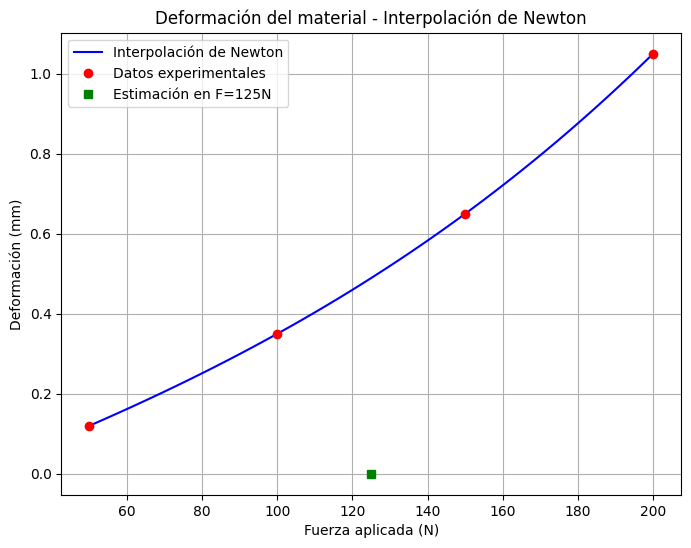

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def newton_divided_diff(x, y):
    """ Calcula la tabla de diferencias divididas de Newton """
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # Primera columna es y

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i+1, j-1] - coef[i, j-1]) / (x[i+j] - x[i])

    return coef[0, :]

def newton_interpolation(x_data, y_data, x):
    """ Evalúa el polinomio de Newton en los puntos x """
    coef = newton_divided_diff(x_data, y_data)
    n = len(x_data)

    y_interp = np.zeros_like(x)
    for i in range(len(x)):
        term = coef[0]
        product = 1
        for j in range(1, n):
            product *= (x[i] - x_data[j-1])
            term += coef[j] * product
        y_interp[i] = term

    return y_interp

# 1. Obtener la ecuación que describe la deformación en función de la carga
# Datos del problema
x_data = np.array([50, 100, 150, 200])  # Fuerza (N)
y_data = np.array([0.12, 0.35, 0.65, 1.05])  # Deformación (mm)

# Calcular coeficientes del polinomio de Newton
coef = newton_divided_diff(x_data, y_data)

# Mostrar la ecuación del polinomio
print("1. Ecuación del polinomio de interpolación de Newton:")
print(f"ε(F) = {coef[0]:.6f}", end="")
for i in range(1, len(coef)):
    print(f" + {coef[i]:.6f}", end="")
    for j in range(i):
        print(f"(F-{x_data[j]})", end="")
print("\n")

# 2. Estimar la deformación para F = 125 N
F_eval = 125
epsilon_eval = newton_interpolation(x_data, y_data, np.array([F_eval]))[0]
print(f"2. La deformación estimada para F = {F_eval} N es: {epsilon_eval:.4f} mm\n")

# 3. Generar gráfica de la interpolación
F_vals = np.linspace(min(x_data), max(x_data), 100)
epsilon_interp = newton_interpolation(x_data, y_data, F_vals)

plt.figure(figsize=(8, 6))
plt.plot(F_vals, epsilon_interp, 'b-', label='Interpolación de Newton')
plt.plot(x_data, y_data, 'ro', label='Datos experimentales')
plt.plot([F_eval], [epsilon_eval], 'gs', label=f'Estimación en F={F_eval}N')
plt.xlabel('Fuerza aplicada (N)')
plt.ylabel('Deformación (mm)')
plt.title('Deformación del material - Interpolación de Newton')
plt.legend()
plt.grid(True)
plt.savefig("deformacion_material.png")
plt.show()

1. Polinomio interpolador de Newton:
η(T) = 30.0000 + 0.100000(T-200) + 0.000000(T-200)(T-250) + 0.000001(T-200)(T-250)(T-300) + -0.000000(T-200)(T-250)(T-300)(T-350)

2. La eficiencia estimada a 275°C es: 37.00%



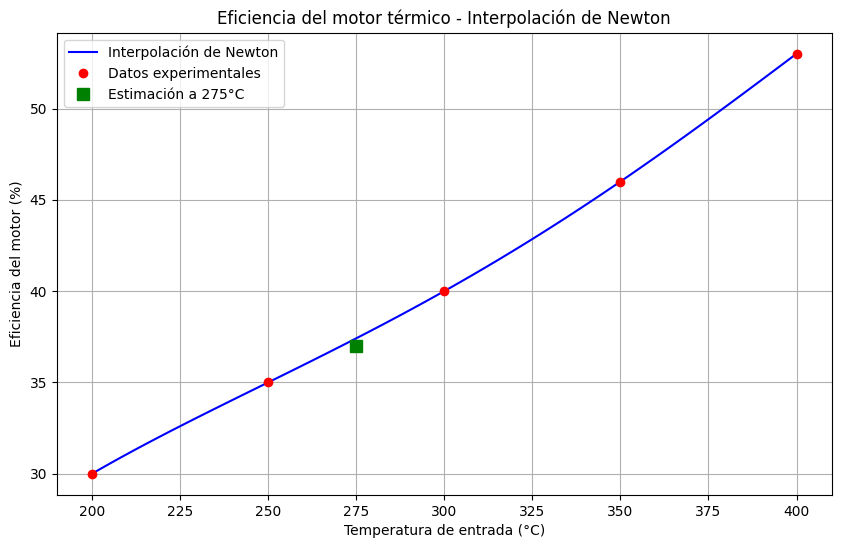

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def newton_divided_diff(x, y):
    """Calcula la tabla de diferencias divididas de Newton"""
    n = len(x)
    coef = np.zeros([n, n])
    coef[:,0] = y  # Primera columna son los valores de y

    for j in range(1, n):
        for i in range(n - j):
            coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x[i+j] - x[i])

    return coef[0,:]

def newton_interpolation(x_data, y_data, x):
    """Evalúa el polinomio de Newton en puntos x"""
    coef = newton_divided_diff(x_data, y_data)
    n = len(x_data)

    y_interp = np.zeros_like(x)
    for i in range(len(x)):
        term = coef[0]
        product = 1
        for j in range(1, n):
            product *= (x[i] - x_data[j-1])
            term += coef[j] * product
        y_interp[i] = term

    return y_interp

# 1. Construir el polinomio interpolador
T_data = np.array([200, 250, 300, 350, 400])  # Temperatura en °C
eff_data = np.array([30, 35, 40, 46, 53])      # Eficiencia en %

coef = newton_divided_diff(T_data, eff_data)

print("1. Polinomio interpolador de Newton:")
print(f"η(T) = {coef[0]:.4f}", end="")
for i in range(1, len(coef)):
    print(f" + {coef[i]:.6f}", end="")
    for j in range(i):
        print(f"(T-{T_data[j]})", end="")
print("\n")

# 2. Predecir eficiencia a 275°C
T_eval = 275
eff_eval = newton_interpolation(T_data, eff_data, np.array([T_eval]))[0]
print(f"2. La eficiencia estimada a {T_eval}°C es: {eff_eval:.2f}%\n")

# 3. Generar gráfica
T_vals = np.linspace(min(T_data), max(T_data), 100)
eff_interp = newton_interpolation(T_data, eff_data, T_vals)

plt.figure(figsize=(10, 6))
plt.plot(T_vals, eff_interp, 'b-', label='Interpolación de Newton')
plt.plot(T_data, eff_data, 'ro', label='Datos experimentales')
plt.plot([T_eval], [eff_eval], 'gs', markersize=8, label=f'Estimación a {T_eval}°C')
plt.xlabel('Temperatura de entrada (°C)')
plt.ylabel('Eficiencia del motor (%)')
plt.title('Eficiencia del motor térmico - Interpolación de Newton')
plt.legend()
plt.grid(True)
plt.savefig("eficiencia_motor.png", dpi=300)
plt.show()

1. Polinomio interpolador de Newton:
C_d(V) = 0.32000 + -0.00200000(V-10) + 0.00000000(V-10)(V-20) + 0.00000167(V-10)(V-20)(V-30) + -0.00000008(V-10)(V-20)(V-30)(V-40) + 0.00000000(V-10)(V-20)(V-30)(V-40)(V-50)

2. El coeficiente de arrastre estimado a 35 m/s es: 0.00000



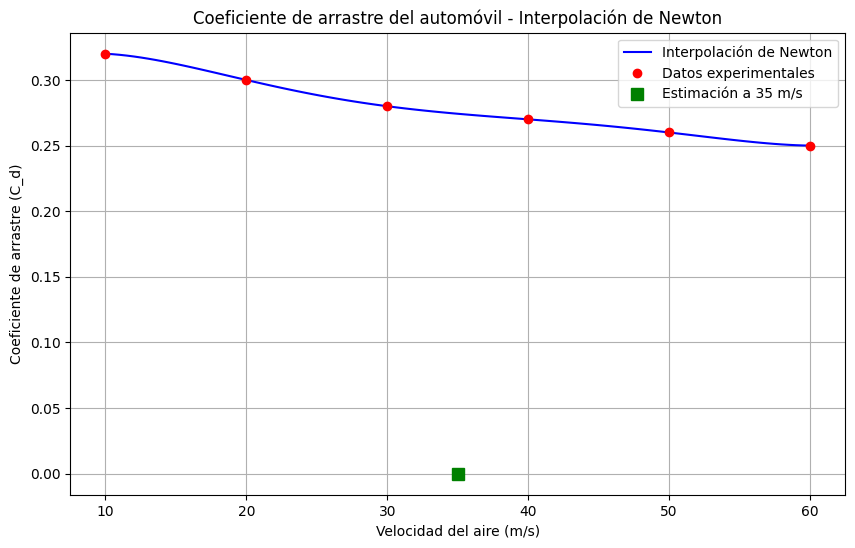

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def newton_divided_diff(x, y):
    """Calcula la tabla de diferencias divididas de Newton"""
    n = len(x)
    coef = np.zeros([n, n])
    coef[:,0] = y  # Primera columna son los valores de y

    for j in range(1, n):
        for i in range(n - j):
            coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x[i+j] - x[i])

    return coef[0,:]

def newton_interpolation(x_data, y_data, x):
    """Evalúa el polinomio de Newton en puntos x"""
    coef = newton_divided_diff(x_data, y_data)
    n = len(x_data)

    y_interp = np.zeros_like(x)
    for i in range(len(x)):
        term = coef[0]
        product = 1
        for j in range(1, n):
            product *= (x[i] - x_data[j-1])
            term += coef[j] * product
        y_interp[i] = term

    return y_interp

# 1. Obtener el polinomio interpolador
V_data = np.array([10, 20, 30, 40, 50, 60])  # Velocidad en m/s
Cd_data = np.array([0.32, 0.30, 0.28, 0.27, 0.26, 0.25])  # Coeficiente de arrastre

coef = newton_divided_diff(V_data, Cd_data)

print("1. Polinomio interpolador de Newton:")
print(f"C_d(V) = {coef[0]:.5f}", end="")
for i in range(1, len(coef)):
    print(f" + {coef[i]:.8f}", end="")
    for j in range(i):
        print(f"(V-{V_data[j]})", end="")
print("\n")

# 2. Estimar coeficiente a 35 m/s
V_eval = 35
Cd_eval = newton_interpolation(V_data, Cd_data, np.array([V_eval]))[0]
print(f"2. El coeficiente de arrastre estimado a {V_eval} m/s es: {Cd_eval:.5f}\n")

# 3. Generar gráfica
V_vals = np.linspace(min(V_data), max(V_data), 100)
Cd_interp = newton_interpolation(V_data, Cd_data, V_vals)

plt.figure(figsize=(10, 6))
plt.plot(V_vals, Cd_interp, 'b-', label='Interpolación de Newton')
plt.plot(V_data, Cd_data, 'ro', label='Datos experimentales')
plt.plot([V_eval], [Cd_eval], 'gs', markersize=8, label=f'Estimación a {V_eval} m/s')
plt.xlabel('Velocidad del aire (m/s)')
plt.ylabel('Coeficiente de arrastre (C_d)')
plt.title('Coeficiente de arrastre del automóvil - Interpolación de Newton')
plt.legend()
plt.grid(True)
plt.savefig("coeficiente_arrastre.png", dpi=300)
plt.show()